In [1]:
!nvidia-smi

Wed Jun  7 08:14:59 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   62C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
HOME=os.getcwd()
print(HOME)

/content


In [5]:
!pip install ultralytics==8.0.20

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.2/261.2 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.5/206.5 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 57.0 MB/s eta 0:00:00


In [6]:
from IPython import display
display.clear_output()
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CPU
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.3/107.7 GB disk)


In [7]:
from ultralytics import YOLO

from IPython.display import display,Image

###**Custom Training**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/construction_safety_gears

/content/drive/MyDrive/construction_safety_gears


In [3]:
!ls

construction_safety_gears_detection_api.ipynb  data.yaml  yolov8s.pt
data					       runs



###**Training the model**

In [10]:
%cd /content/drive/MyDrive/construction_safety_gears
!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=100 imgsz=640 plots=true

/content/drive/MyDrive/construction safety gears api
100% 21.5M/21.5M [00:00<00:00, 122MB/s] 

Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscr

In [11]:
!ls runs/detect/train

args.yaml					    train_batch0.jpg
confusion_matrix.png				    train_batch1.jpg
events.out.tfevents.1686126791.9500beb197e2.5471.0  train_batch2070.jpg
F1_curve.png					    train_batch2071.jpg
P_curve.png					    train_batch2072.jpg
PR_curve.png					    train_batch2.jpg
R_curve.png					    val_batch0_labels.jpg
results.csv					    val_batch0_pred.jpg
results.png					    weights


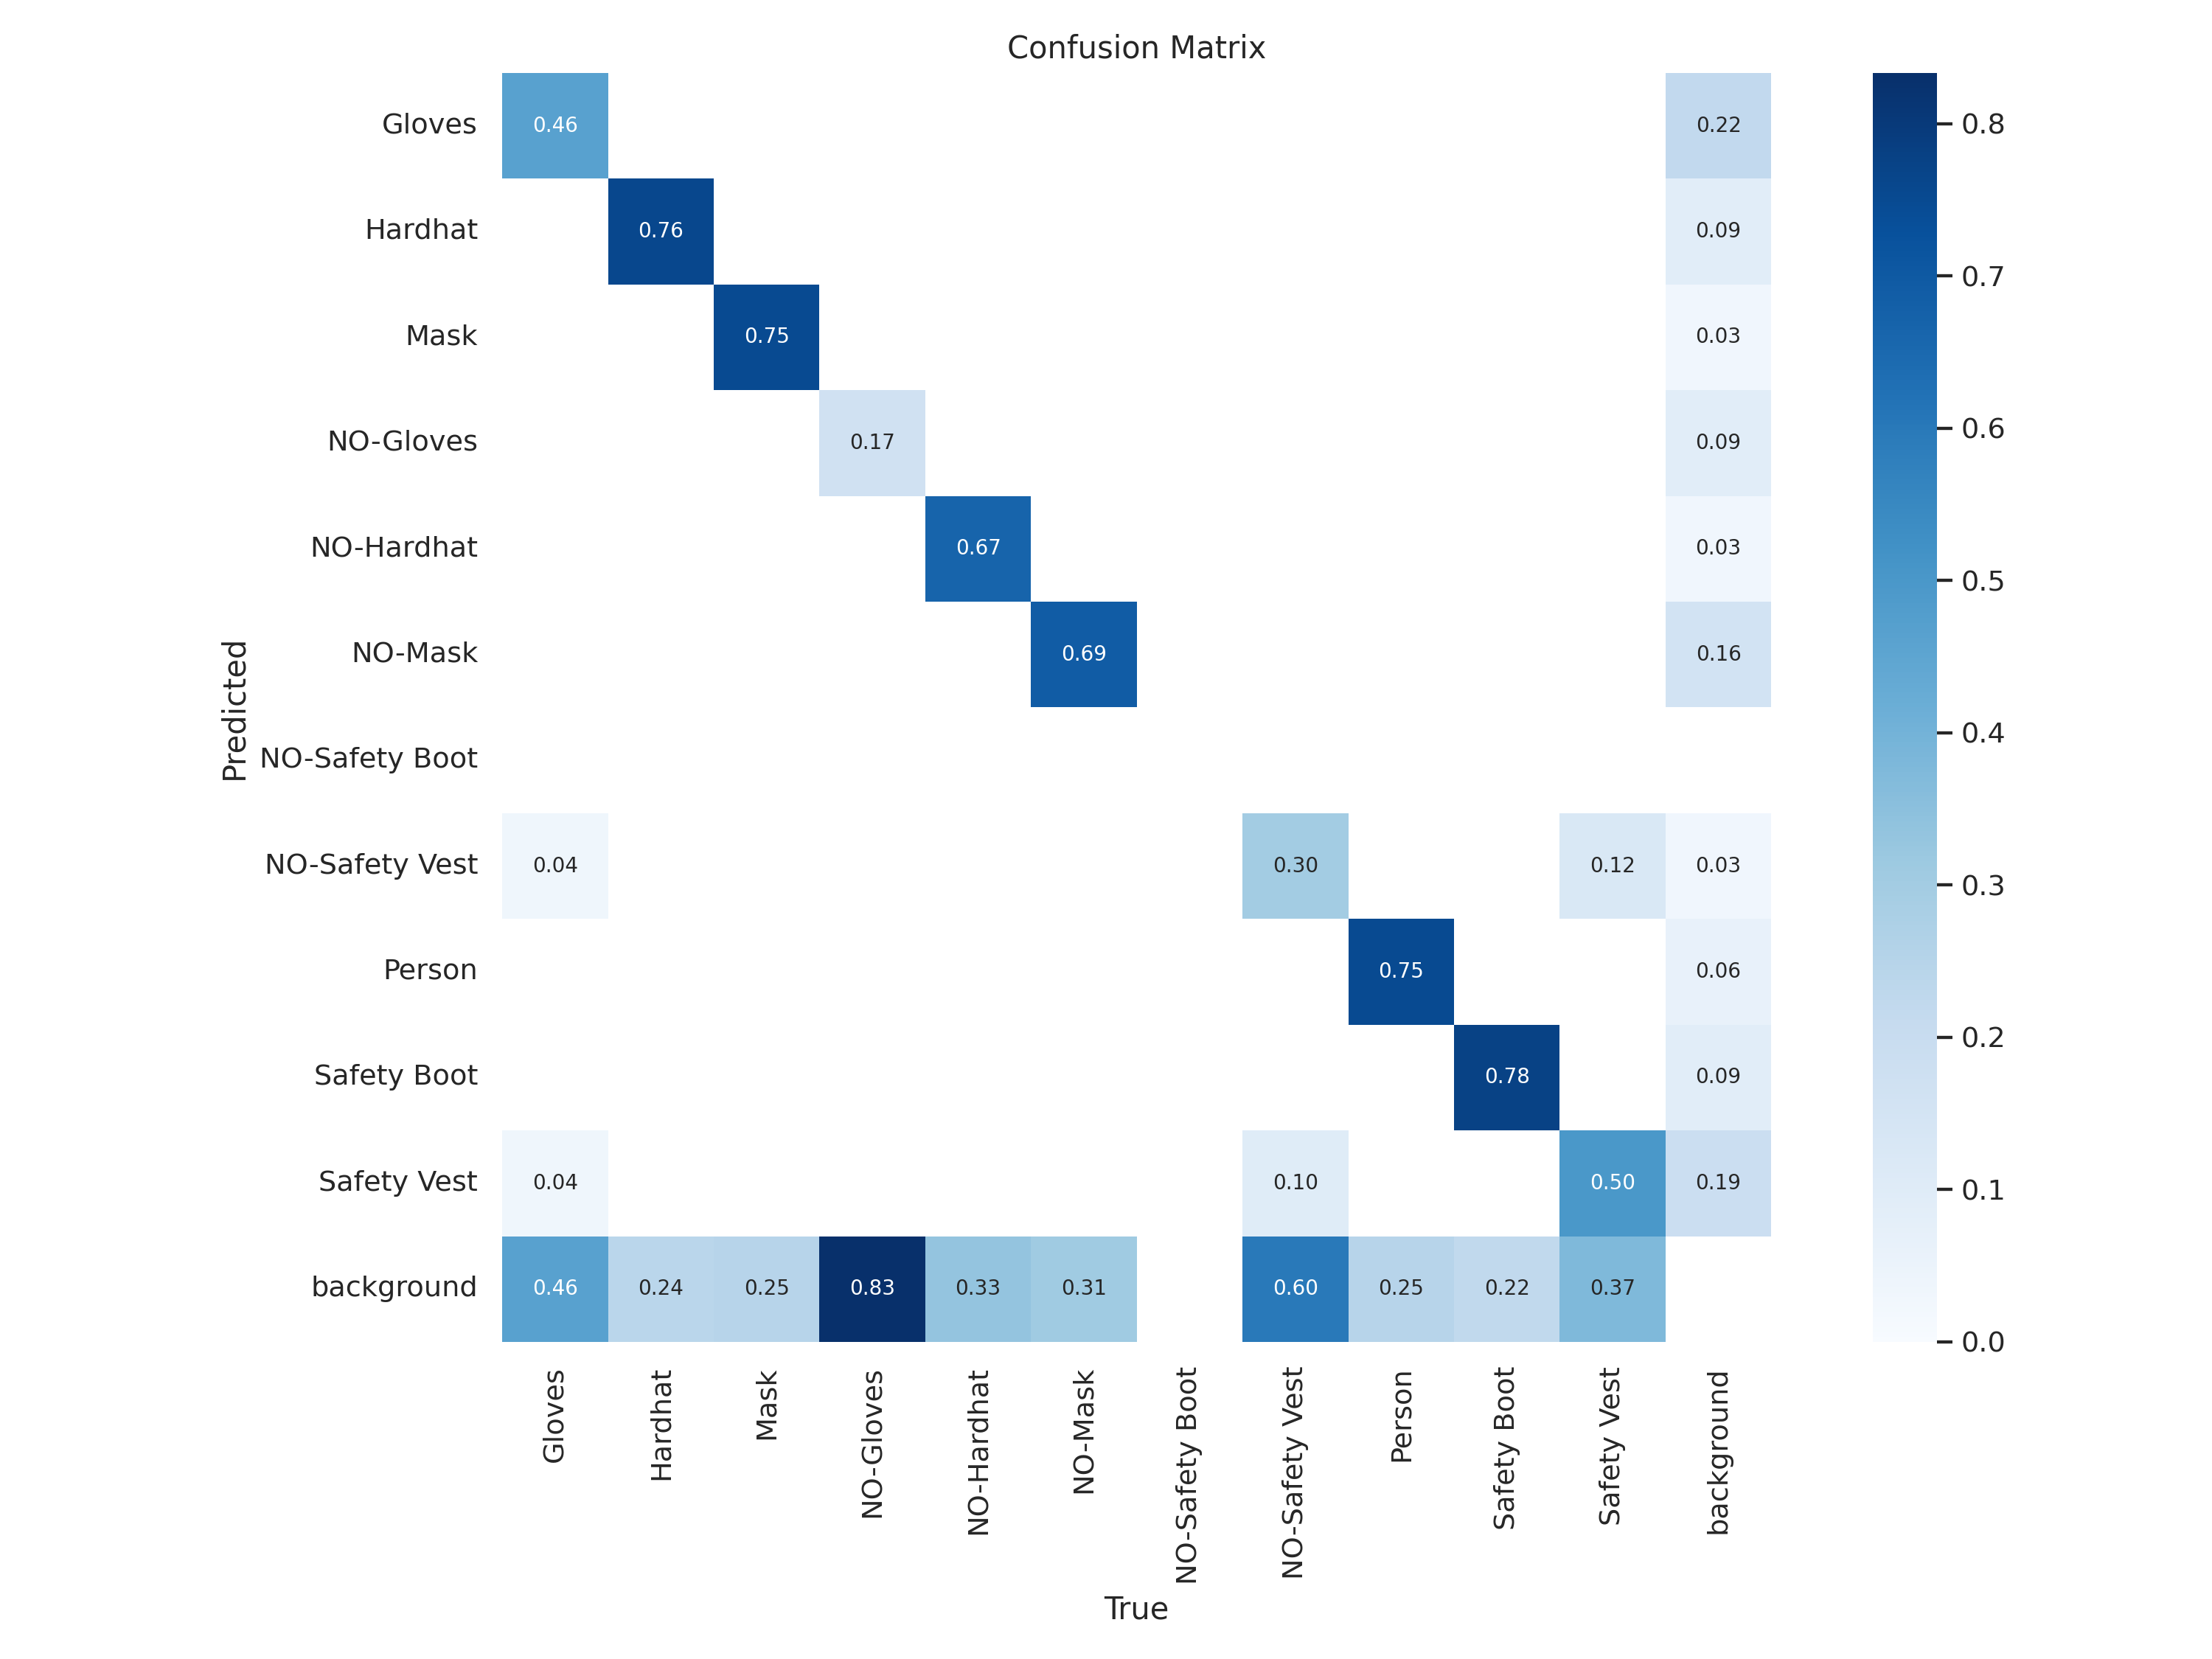

In [8]:
Image(filename='/content/drive/MyDrive/construction_safety_gears/runs/detect/train/confusion_matrix.png',width=600)

###**Validating the moodel**

In [9]:
cd /content/drive/MyDrive/construction_safety_gears

/content/drive/MyDrive/construction_safety_gears


In [19]:
!ls

construction_safety_gears_detection_api.ipynb  data.yaml  yolov8s.pt
data					       runs


In [21]:
!yolo task=detect mode=val model=/content/drive/MyDrive/construction_safety_gears/runs/detect/train/weights/best.pt data=data.yaml

2023-06-07 09:36:02.609735: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-07 09:36:03.485748: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11129841 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/drive/MyDrive/construction_safety_gears_api/data/valid/labels... 30 images, 0 backgrounds, 0 corrupt: 100% 30/30 [00:00<00:00, 327.85it/s]
val: New cache created: /content/drive/MyDrive/construction_safety_gears_api/data/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 4, len(boxes) = 155. To resolve this only boxes wi

###**Inference with a test**

In [19]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/construction_safety_gears/runs/detect/train/weights/best.pt conf=0.30 source=/content/drive/MyDrive/construction_safety_gears/data/test/newtestimage iou=0.6 save=True augment=True

2023-06-07 16:22:51.408871: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-07 16:22:52.636914: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CPU
Model summary (fused): 168 layers, 11129841 parameters, 0 gradients, 28.5 GFLOPs
image 1/11 /content/drive/MyDrive/construction_safety_gears/data/test/newtestimage/138574-kkixmakgsf-1591089104.jpg: 352x640 1 Hardhat, 1 NO-Safety Vest, 2 Persons, 2 Safety Boots, 776.9ms
image 2/11 /content/drive/MyDrive/construction_safety_gears/data/test/newtestimage/159-1596382_health-construction-worker-safety-hd-png-download.png: 640x512 1 Hardhat, 1 NO-Gloves, 1 NO-Mask, 1 Person, 1 Safety Vest, 1066.8ms
imag

###**Export custom trained model**


In [12]:
!yolo export model=/content/drive/MyDrive/construction_safety_gears_api/runs/detect/train/weights/best.pt format=onnx #onnx format

2023-06-07 14:41:48.987448: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-07 14:41:50.311379: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11129841 parameters, 0 gradients, 28.5 GFLOPs

PyTorch: starting from /content/drive/MyDrive/construction_safety_gears_api/runs/detect/train/weights/best.pt with output shape (1, 15, 8400) (21.5 MB)

ONNX: starting export with onnx 1.14.0...
============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================

###**Result**


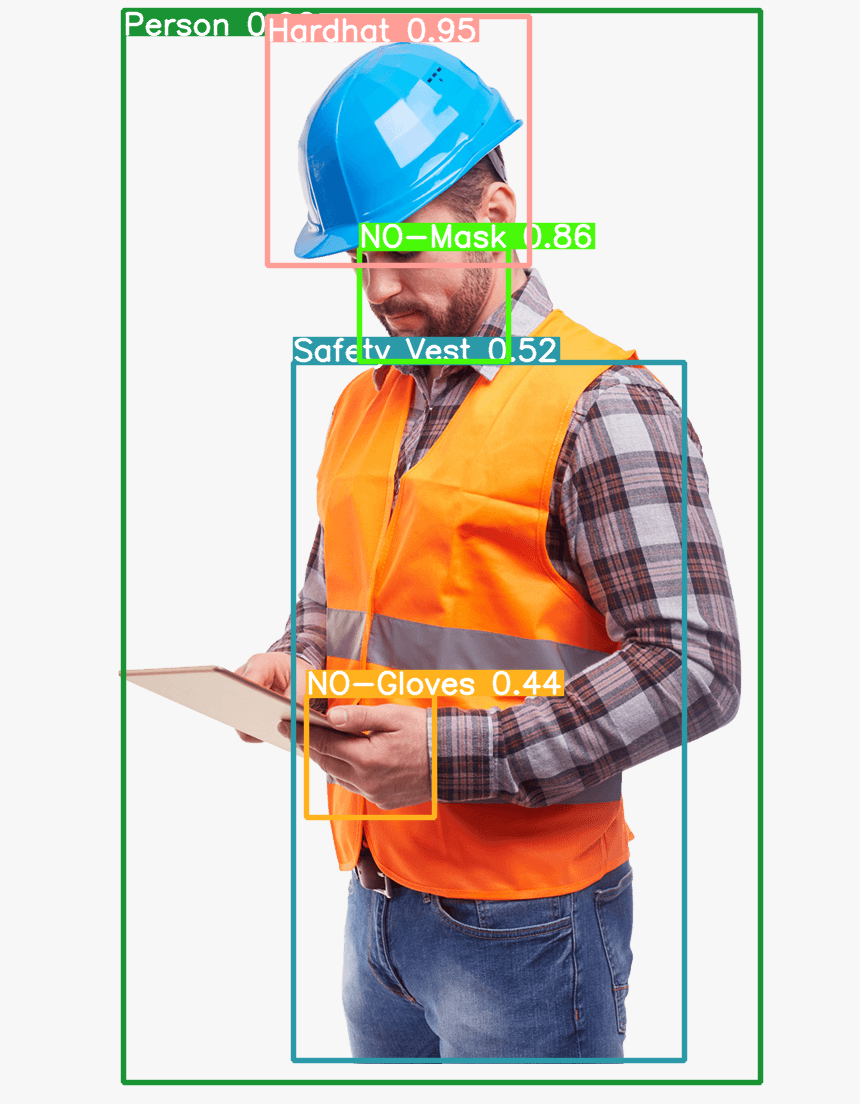

In [20]:
Image(filename='/content/drive/MyDrive/construction_safety_gears/runs/detect/predict8/159-1596382_health-construction-worker-safety-hd-png-download.png',width=600)

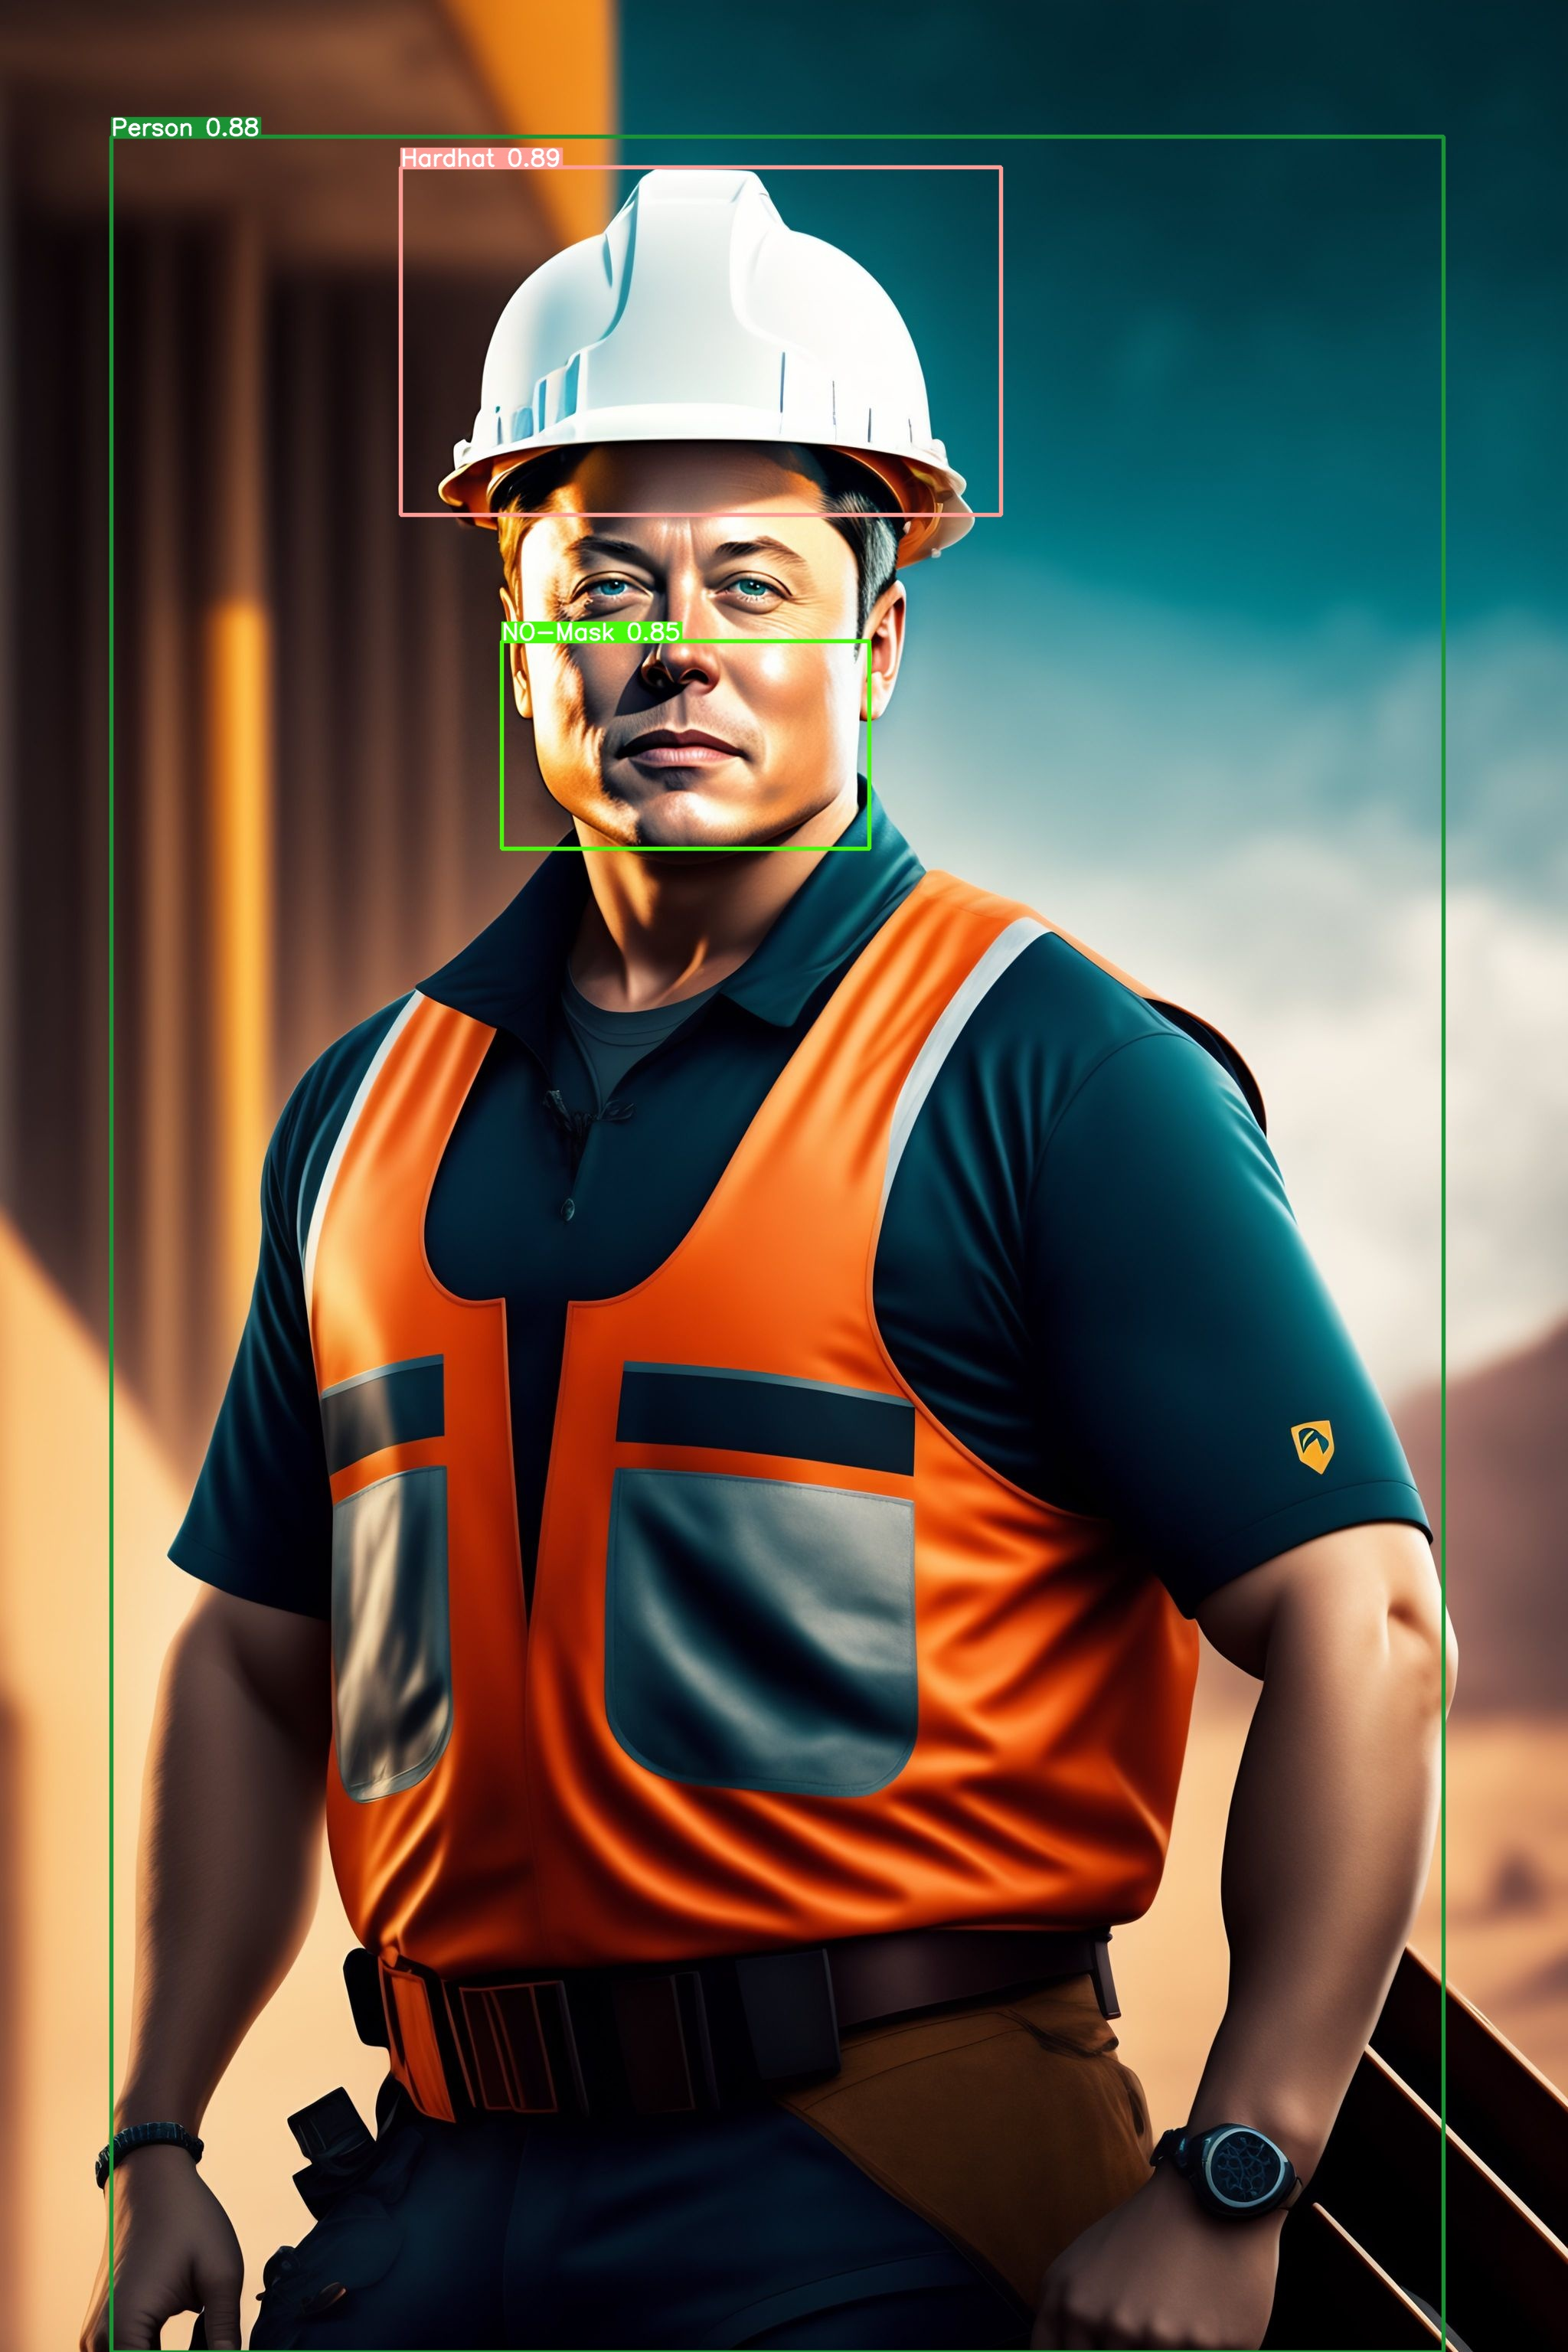

In [21]:
Image(filename='/content/drive/MyDrive/construction_safety_gears/runs/detect/predict8/Elon Musk as a construction worker.  Hd.jpg',width=600)